In [1]:
import math
import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
page_id = "hkfootstop"

path = 'post/'+page_id+'_post.csv'

In [3]:
data = pd.read_csv(path, encoding = 'utf8')

In [4]:
data.head()

,status_id,status_message,link_name,status_type,status_link,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,812148768907272_1411519232303553,【曼聯Stop對修咸頓】- Row AA\r\n\r\n坐第一行喎，有啲球迷就覺得坐高啲睇...,Photos from Footstop's post,photo,https://www.facebook.com/812148768907272/posts...,2017-12-31 01:26:20,29,1,0,24,3,1,1,0,0
1,812148768907272_1410699829052160,"【皇家馬德里 Stop】2月套票 聯賽對皇家蘇斯達+歐聯對巴黎聖日耳門 \r\n【港幣15,...",NaN,photo,https://www.facebook.com/812148768907272/posts...,2017-12-30 10:35:01,163,17,14,151,6,0,6,0,0
2,812148768907272_1410683962387080,"【巴塞隆那 Stop】歐聯對車路士+ 聯賽對畢爾包\r\n【港幣14,000 來回機票 + ...",NaN,photo,https://www.facebook.com/812148768907272/posts...,2017-12-30 10:13:01,133,12,3,131,0,1,0,0,1
3,812148768907272_1405857539536389,【Footstop】當世最強之兩人 沒有其他...\r\n\r\n扮中立先\r\n尋晚場波踢...,NaN,photo,https://www.facebook.com/812148768907272/posts...,2017-12-24 13:32:22,32,4,0,31,0,0,1,0,0
4,812148768907272_1400645023390974,【非Footstop】本店假期到12月25日，26日營業...\r\n\r\n由於版主嘅人已...,NaN,photo,https://www.facebook.com/812148768907272/posts...,2017-12-18 15:29:58,6,0,0,6,0,0,0,0,0


In [5]:
len(data)

516

In [6]:
data = data[(data['num_reactions']!=0) & (data['status_message'].notnull())].reindex()

In [7]:
len(data)

505

In [8]:
data['datetime'] = data['status_published'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
data['weekday'] = data['datetime'].apply(lambda x: x.weekday_name)
data['hour'] = data['datetime'].apply(lambda x:  x.hour)

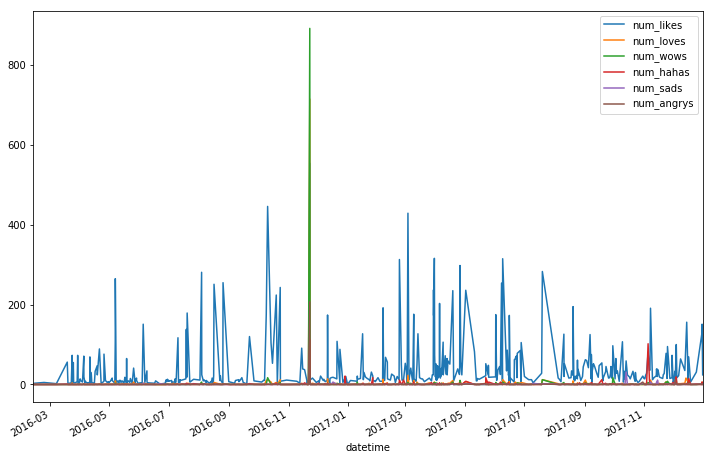

In [9]:
data.plot(x='datetime', y=['num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys'] ,
       figsize=(12,8))

In [10]:
data2 = data.drop([323])

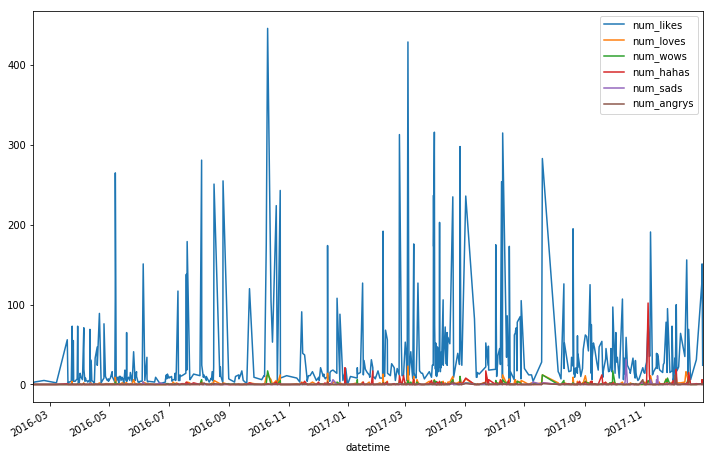

In [11]:
data2.plot(x='datetime', y=['num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys'] ,
       figsize=(12,8))

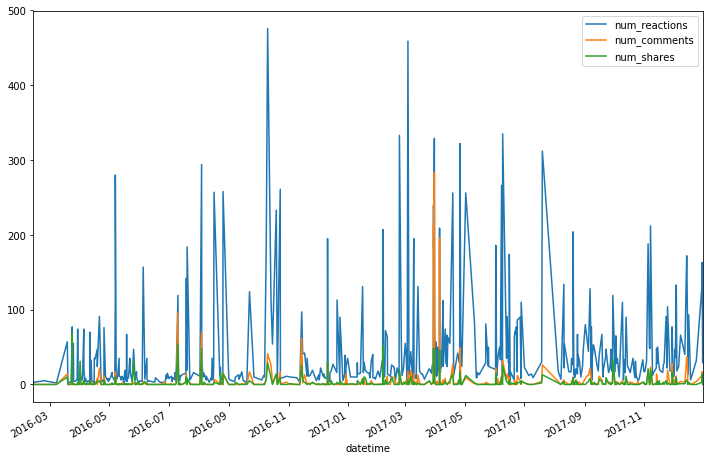

In [12]:
data2.plot(x='datetime', y=['num_reactions', 'num_comments', 'num_shares'],
       figsize=(12,8))

In [13]:
import datetime
delta_datetime = data['datetime'].shift(1) - data['datetime']
delta_datetime_df = pd.Series(delta_datetime).describe().apply(str)
delta_datetime_df = delta_datetime_df.to_frame(name='frequent of posts')
delta_datetime_df

,frequent of posts
count,504
mean,1 days 08:43:48.513888
std,1 days 17:33:17.590219
min,-1 days +19:02:26
25%,0 days 07:32:00.250000
50%,0 days 21:29:18
75%,1 days 18:57:53
max,16 days 05:39:55


In [14]:
def weekday(d):
    list_key = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    list_value = []
    for one in list_key:
        if one in d.keys():
            list_value.append(d[one])
        else:
            list_value.append(0)
    df = pd.DataFrame(index = list_key, data = {'weekday': list_value}).reset_index()
    return df

In [15]:
df_weekday = weekday(dict(data['weekday'].value_counts()))
df_weekday

,index,weekday
0,Monday,77
1,Tuesday,83
2,Wednesday,78
3,Thursday,78
4,Friday,75
5,Saturday,69
6,Sunday,45


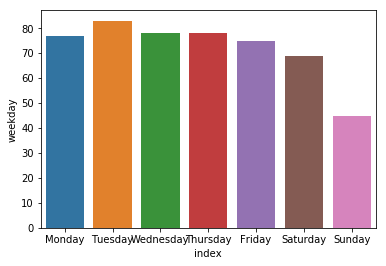

In [16]:
sns.barplot(x='index', y='weekday', data = df_weekday)

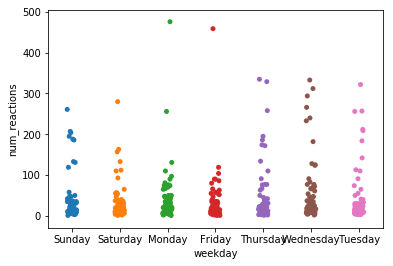

In [17]:
sns.stripplot(x='weekday',y='num_reactions', data = data2, jitter=True)

In [18]:

def hour(d):
    list_key = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
    list_value = []
    for one in list_key:
        if one in d.keys():
            list_value.append(d[one])
        else:
            list_value.append(0)
    df = pd.DataFrame(index = list_key, data = {'hour': list_value}).reset_index()
    return df

In [19]:
df_hour = hour(dict(data['hour'].value_counts()))
df_hour

,index,hour
0,0,23
1,1,18
2,2,12
3,3,5
4,4,1
5,5,2
6,6,0
7,7,1
8,8,8
9,9,21


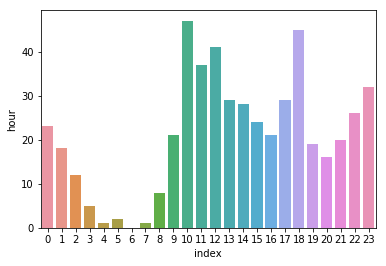

In [20]:
ax = sns.barplot(x='index', y='hour', data = df_hour)

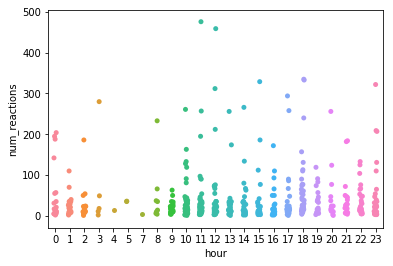

In [21]:
sns.stripplot(x='hour',y='num_reactions', data = data2, jitter=True)

In [22]:
df_status_type = data['status_type'].value_counts().to_frame(name='status_type')
df_status_type

,status_type
photo,357
video,136
link,12


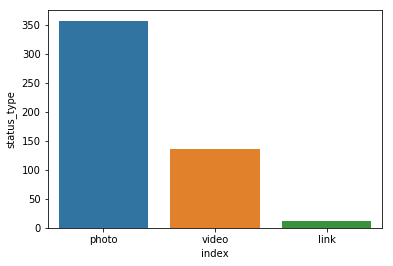

In [23]:
sns.barplot(x='index', y='status_type', data = df_status_type.reset_index())

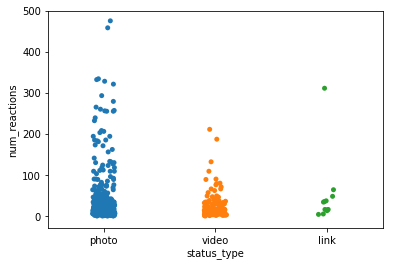

In [24]:
sns.stripplot(x="status_type", y="num_reactions", data=data2, jitter=True)

In [70]:
import jieba
import jieba.analyse
import operator
from wordcloud import WordCloud, STOPWORDS

In [26]:
list(data['status_message'])[324]

'【England Stop】- 2月 抵睇\r\n#波係要現場睇 #2月抵睇 #睇波自由人\r\n#英超 #2月9至14日\r\n#利記 #曼\r\n\r\n留意返，優惠只在今天\r\n\r\n今日國泰出Fanfares 直飛曼徹斯特連稅都係講緊5K，仲平過轉機呀! 岩先睇過，2月9至14日，咁岩夾正呢2場波，簡直fit fit 孖寶。\r\n\r\n2月11日 : 曼聯 對 屈福特 : 港幣5,000 每人\r\n2月11日 : 利物浦 對 熱刺 : 港幣7,200 每人\r\n\r\n有齊\r\n- 5晚市內酒店\r\n- 球賽門票(球場橫邊位置)\r\n\r\n仲唔即刻去搶機票?? \r\nhttp://www.cathaypacific.com/cx/zh_HK/latest-offers/flights/fanfares\r\n\r\n可以Inbox 問我哋\r\n或者打 3743 0543\r\n又可以Whatsapp 9013 2318\r\n阿龍\r\n--------------------------------------------------------------------------\r\nJump 去旅行！\r\nfb.com/jump2world\r\nJUMP Sports and Travel\r\nhttp://www.jumptravel.com.hk/'

In [27]:
for one in jieba.cut(list(data['status_message'])[99]):
    print (one)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Tommy\AppData\Local\Temp\jieba.cache


【


Loading model cost 0.986 seconds.
Prefix dict has been built succesfully.


Liverpool
 
Stop
】
-
 
唱到
拆
咪
!
!
 
雞皮
起
哂
!
!




球迷
 
@
Miu
 
Tsui
 
上星期
入場
睇
利記
對
阿仙奴
。




拍得
幾萬人齊
高歌
 
YNWA
!
!
 
係
揀
動
既
!
!
 




LUNG


In [28]:
jieba.analyse.extract_tags(list(data['status_message'])[99], topK=20)

['Liverpool',
 'Stop',
 '雞皮',
 'Miu',
 'Tsui',
 '入場',
 '利記',
 '阿仙奴',
 '幾萬人齊',
 'YNWA',
 'LUNG',
 '上星期',
 '唱到',
 '拍得',
 '球迷',
 '高歌']

In [48]:
def jieba_extract(message_list):
    word_count = {}
    for message in message_list:
        # 在抽取關鍵字時,可能會發生錯誤,先把錯誤的message收集起來,看看是怎麼一回事
        seg_list = jieba.analyse.extract_tags(message, topK=120)
        for seg in seg_list:
            if not seg in word_count:
                word_count[seg] = 1
            else:
                word_count[seg] += 1

    sorted_word_count = sorted(word_count.items(), key=operator.itemgetter(1))
    #sorted_word_count_dict = dict(sorted_word_count)
    sorted_word_count.reverse()
    return sorted_word_count
sorted_word_count = jieba_extract(list(data['status_message']))

In [49]:
sorted_word_count_dict = dict(sorted_word_count)

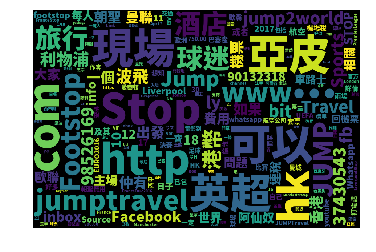

In [74]:
tpath = 'NotoSansCJKtc-Black.otf'
wc = WordCloud(max_font_size=120, relative_scaling=.1,font_path=tpath,width=900, height=600, stopwords=True).fit_words(sorted_word_count_dict)
plt.imshow(wc)
plt.axis("off")
plt.figure(figsize=(10,6), dpi = 100)
plt.show()